# Préparation de l'environnement de travail

### Importation des Bibliothèques 

In [1]:
!pip install nltk pandas scikit-learn

import pandas as pd
import string
from bs4 import BeautifulSoup

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB

!pip install tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

!pip install tabulate

from tabulate import tabulate


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


Defaulting to user installation because normal site-packages is not writeable


2024-01-30 19:43:42.934805: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-30 19:43:42.934863: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-30 19:43:42.965412: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-30 19:43:43.031578: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-30 19:43:43.961789: W tensorflow/compiler/tf2

Defaulting to user installation because normal site-packages is not writeable


# Étape 1 : Chargement du fichier CSV dans un DataFrame

Dans cette première étape, nous avons chargé notre jeu de données à partir d'un fichier CSV en utilisant la bibliothèque pandas.
Le fichier CSV contient des critiques de films et leur sentiment associé (positif ou négatif).
En utilisant la fonction read_csv de pandas, nous avons créé un DataFrame nommé data qui stocke ces informations de manière tabulaire.

In [2]:
# Charger le fichier CSV dans un DataFrame
data = pd.read_csv("IMDB_Dataset.csv")

# Afficher les premières lignes du DataFrame pour vérification
data.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Étape 2 : Analyse exploratoire des données

### 2.1 Examiner la structure des données

Dans cette étape, nous avons effectué une exploration initiale de la structure de notre jeu de données.
En utilisant la méthode info() du DataFrame, nous avons obtenu des informations essentielles telles que le nombre de lignes, le nombre de colonnes et les types de données de chaque colonne.

In [3]:
# Afficher des informations sur le DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


### 2.2 Vérifier la distribution des classes (sentiments)

Cette sous-étape consiste à examiner la répartition des classes dans la variable cible ('sentiment' dans notre cas).
En utilisant la méthode value_counts(), nous avons compté le nombre d'occurrences de chaque classe (positif et négatif).

In [4]:
# Compter le nombre d'occurrences de chaque classe
data['sentiment'].value_counts()


sentiment
positive    25000
negative    25000
Name: count, dtype: int64

### 2.3 Visualiser des statistiques descriptives

In [5]:
# Afficher des statistiques descriptives
data.describe()


,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


# Étape 3 : Prétraitement des données

### 3.1 Suppression des balises HTML du texte des critiques

Dans cette étape, nous avons créé une fonction remove_html_tags qui utilise la bibliothèque BeautifulSoup pour supprimer les balises HTML du texte.
Ensuite, nous avons appliqué cette fonction à la colonne 'review' du DataFrame pour éliminer tout balisage HTML dans le texte des critiques.

In [6]:
# Fonction pour supprimer les balises HTML
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Appliquer la fonction sur la colonne 'review'
data['review'] = data['review'].apply(remove_html_tags)


/tmp/ipykernel_4380/2793885300.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


### 3.2 Conversion du texte en minuscules

Dans cette sous-étape, nous avons converti l'ensemble du texte des critiques en minuscules.
Ceci est réalisé en utilisant la méthode str.lower() sur la colonne 'review', assurant ainsi une uniformité dans la casse du texte.

In [7]:
# Convertir le texte en minuscules
data['review'] = data['review'].str.lower()


### 3.3 Suppression de la ponctuation

Nous avons créé une fonction remove_punctuation qui utilise la méthode translate pour supprimer la ponctuation du texte.
Ensuite, nous avons appliqué cette fonction à la colonne 'review' du DataFrame pour éliminer tous les signes de ponctuation.

In [8]:
# Fonction pour supprimer la ponctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))

# Appliquer la fonction sur la colonne 'review'
data['review'] = data['review'].apply(remove_punctuation)


### 3.4 Suppression des stop words

Dans cette sous-étape, nous avons créé une fonction remove_stopwords qui utilise la liste des stop words de la langue anglaise provenant de la bibliothèque NLTK.
La fonction supprime les stop words du texte en divisant le texte en mots, filtrant les mots qui ne sont pas des stop words, puis recombinant les mots.

In [9]:
# Fonction pour supprimer les stop words
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = [word for word in text.split() if word.lower() not in stop_words]
    return ' '.join(words)

# Appliquer la fonction sur la colonne 'review'
data['review'] = data['review'].apply(remove_stopwords)


### 3.5 Tokenisation

Nous avons créé une fonction tokenize_text qui utilise la méthode word_tokenize de la bibliothèque NLTK pour diviser le texte en mots (tokens).
La fonction a été appliquée à la colonne 'review' du DataFrame pour créer une liste de mots pour chaque critique.

In [10]:
# Fonction de tokenisation
def tokenize_text(text):
    return word_tokenize(text)

# Appliquer la fonction sur la colonne 'review'
data['review'] = data['review'].apply(tokenize_text)


### 3.6 Lemmatisation ou racinisation des mots

Dans cette sous-étape, nous avons créé une fonction lemmatize_text qui utilise le lemmatiseur de la bibliothèque NLTK pour ramener les mots à leur forme de base (lemme).
La fonction a été appliquée à la colonne 'review' du DataFrame pour lemmatiser chaque mot dans chaque critique.

In [11]:
# Fonction de lemmatisation
def lemmatize_text(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]

# Appliquer la fonction sur la colonne 'review'
data['review'] = data['review'].apply(lemmatize_text)


# Étape 4 : Division des données

Cette étape a pour objectif de diviser nos données en ensembles d'entraînement et de test.
Nous avons utilisé la fonction train_test_split de scikit-learn pour accomplir cela, en spécifiant un ratio de 80% pour l'ensemble d'entraînement et 20% pour l'ensemble de test.

In [12]:
# Diviser les données en ensembles d'entraînement et de test (80% - 20%)
train_data, test_data, train_labels, test_labels = train_test_split(
    data['review'], data['sentiment'], test_size=0.2, random_state=42
)


# Étape 5 : Vectorisation du texte

Dans cette étape, nous avons utilisé la bibliothèque scikit-learn pour effectuer la vectorisation du texte en utilisant la méthode TF-IDF (Term Frequency-Inverse Document Frequency).
Le vectoriseur TF-IDF attribue des poids aux mots en fonction de leur fréquence dans le texte et de leur importance dans l'ensemble du corpus.

In [13]:
# Initialiser le vectoriseur TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Appliquer le vectoriseur sur les données d'entraînement et de test
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data.astype('str'))
X_test_tfidf = tfidf_vectorizer.transform(test_data.astype('str'))


# Étape 6 : Construction du modèle SVM

Dans cette étape, nous avons construit notre modèle d'analyse de sentiment en utilisant une machine à vecteurs de support (SVM) avec un noyau linéaire.
La bibliothèque scikit-learn a été utilisée, et le modèle a été initialisé avec la classe SVC (Support Vector Classification).

In [14]:
# Initialiser le modèle SVM
svm_model = SVC(kernel='linear', random_state=42)

# Entraîner le modèle sur les données d'entraînement
svm_model.fit(X_train_tfidf, train_labels)


SVC(kernel='linear', random_state=42)

# Étape 7 : Évaluation du modèle

Dans cette étape, nous avons évalué la performance de notre modèle SVM sur l'ensemble de test.
Nous avons utilisé les données de test vectorisées (X_test_tfidf) pour prédire les labels de sentiment.
La précision du modèle a été calculée en comparant les prédictions avec les vraies étiquettes (test_labels).

---

Résultat :

La précision globale du modèle SVM est de 88.62%.

In [15]:
# Prédire les labels pour l'ensemble de test
predictions = svm_model.predict(X_test_tfidf)

# Calculer la précision du modèle
accuracy = accuracy_score(test_labels, predictions)
print(f"Précision du modèle : {accuracy:.2%}")

# Afficher le rapport de classification
print("\nRapport de classification :\n", classification_report(test_labels, predictions))


Précision du modèle : 88.62%

Rapport de classification :
               precision    recall  f1-score   support

    negative       0.89      0.87      0.88      4961
    positive       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



# Étape 8 : Interprétation des résultats

Cette étape consiste à interpréter les résultats du modèle en examinant les exemples où il a fait des prédictions incorrectes.
Nous avons identifié les critiques mal classées en comparant les vraies étiquettes (True Label) avec les prédictions du modèle (Predicted Label).

In [16]:
# Afficher les exemples où le modèle a fait des prédictions incorrectes
misclassified = test_data[test_labels != predictions]
misclassified_labels = test_labels[test_labels != predictions]
misclassified_predictions = predictions[test_labels != predictions]

misclassified_df = pd.DataFrame({'Review': misclassified, 'True Label': misclassified_labels, 'Predicted Label': misclassified_predictions})
print("Exemples de prédictions incorrectes :\n", misclassified_df.head())


Exemples de prédictions incorrectes :
                                                   Review True Label  \
33553  [really, liked, summerslam, due, look, arena, ...   positive   
49498  [okay, didnt, get, purgatory, thing, first, ti...   positive   
6113   [production, quality, cast, premise, authentic...   positive   
15118  [movie, released, originally, soft, x, apparen...   positive   
33109  [three, kid, born, solar, eclipse, turn, vile,...   positive   

      Predicted Label  
33553        negative  
49498        negative  
6113         negative  
15118        negative  
33109        negative  


Dans l'exemple 1, le modèle a mal classé une critique positive comme négative, peut-être en raison d'interprétations négatives de certains mots ou phrases. Le même schéma se répète dans les exemples suivants (2 à 5), où des critiques positives ont été incorrectement prédites comme négatives. Le modèle semble avoir du mal avec des nuances subtiles du langage, et des expressions ambigües peuvent induire en erreur. Par exemple, la phrase "didn't get purgatory thing first ti..." peut être interprétée de manière ambiguë. En résumé, les erreurs semblent découler de la complexité du langage et des subtilités dans l'analyse de sentiments.

Étape 9 : TEST - Application du modèle SVM sur de nouvelles données

Dans cette étape, nous avons testé le modèle SVM sur de nouvelles critiques qui n'ont pas été utilisées pendant l'entraînement.
Les nouvelles critiques ont été prétraitées de la même manière que les données d'entraînement, en supprimant les balises HTML, convertissant en minuscules, supprimant la ponctuation, enlevant les stop words, et lemmatisant les mots.
Ensuite, les critiques ont été vectorisées en utilisant le même vectoriseur TF-IDF que celui utilisé lors de l'entraînement.
Enfin, le modèle a prédit le sentiment de chaque nouvelle critique.

--

Les prédictions de sentiment pour chaque nouvelle critique sont présentées. Le modèle a réussi à identifier le sentiment négatif dans les trois premières critiques et le sentiment positif dans les trois dernières critiques, montrant ainsi sa capacité à s'adapter à de nouvelles données.


In [17]:
# Nouvelles critiques
new_reviews = ["The film suffers from a predictable and unoriginal storyline, leaving audiences with a disappointing sense of déjà vu.",
               "The actors performances leave much to be desired, lacking emotional depth and credibility, undermining immersion in the narrative.",
               "Despite polished special effects, the direction suffers from a lack of artistic cohesion, giving the impression that each visual element is added disjointedly.",
               "The film's artistic direction is visually striking, featuring stunning set designs that capture the viewer's attention.",
               "Some scenes are elevated by outstanding actor performances, delivering poignant and memorable moments despite the shortcomings of the storyline.",
               "The technical prowess of the special effects contributes to making certain sequences visually breathtaking, offering moments of grand spectacle despite narrative issues."]

# Prétraitement des nouvelles critiques
new_reviews = [remove_html_tags(review) for review in new_reviews]
new_reviews = [review.lower() for review in new_reviews]
new_reviews = [remove_punctuation(review) for review in new_reviews]
new_reviews = [remove_stopwords(review) for review in new_reviews]
new_reviews = [tokenize_text(review) for review in new_reviews]
new_reviews = [lemmatize_text(tokens) for tokens in new_reviews]

# Vectorisation des nouvelles critiques
new_reviews_tfidf = tfidf_vectorizer.transform([" ".join(tokens) for tokens in new_reviews])

# Prédiction du sentiment des nouvelles critiques
new_predictions = svm_model.predict(new_reviews_tfidf)

# Afficher les prédictions
for review, prediction in zip(new_reviews, new_predictions):
    print(f"Review: {' '.join(review)}\nPredicted Sentiment: {prediction}\n")


Review: film suffers predictable unoriginal storyline leaving audience disappointing sense déjà vu
Predicted Sentiment: negative

Review: actor performance leave much desired lacking emotional depth credibility undermining immersion narrative
Predicted Sentiment: negative

Review: despite polished special effect direction suffers lack artistic cohesion giving impression visual element added disjointedly
Predicted Sentiment: negative

Review: film artistic direction visually striking featuring stunning set design capture viewer attention
Predicted Sentiment: positive

Review: scene elevated outstanding actor performance delivering poignant memorable moment despite shortcoming storyline
Predicted Sentiment: positive

Review: technical prowess special effect contributes making certain sequence visually breathtaking offering moment grand spectacle despite narrative issue
Predicted Sentiment: positive



=================FIN=================

# Étape 10 : Comparaison avec d'autres algorithmes

### 10.1 - Implémentation du modèle Random Forest

Dans cette étape, nous avons introduit un autre algorithme, le modèle Random Forest, pour comparer ses performances avec le modèle SVM déjà implémenté.
Nous avons utilisé la classe RandomForestClassifier de la bibliothèque scikit-learn pour initialiser et entraîner le modèle Random Forest.

In [18]:
# Initialiser le modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle sur les données d'entraînement
rf_model.fit(X_train_tfidf, train_labels)


RandomForestClassifier(random_state=42)

### 10.1 - Évaluation du modèle Random Forest

Après avoir entraîné le modèle Random Forest, nous l'évaluons sur l'ensemble de test de la même manière que le modèle SVM précédent.
Nous utilisons les données de test vectorisées (X_test_tfidf) pour prédire les labels de sentiment à l'aide du modèle Random Forest.
La précision du modèle est calculée en comparant les prédictions avec les vraies étiquettes (test_labels).
Le rapport de classification fournit des mesures détaillées telles que la précision, le rappel et le score F1 pour chaque classe et une moyenne pondérée.

In [19]:
# Prédire les labels pour l'ensemble de test
rf_predictions = rf_model.predict(X_test_tfidf)

# Calculer la précision du modèle
rf_accuracy = accuracy_score(test_labels, rf_predictions)
print(f"Précision du modèle Random Forest : {rf_accuracy:.2%}")

# Afficher le rapport de classification
print("\nRapport de classification Random Forest :\n", classification_report(test_labels, rf_predictions))


Précision du modèle Random Forest : 84.84%

Rapport de classification Random Forest :
               precision    recall  f1-score   support

    negative       0.84      0.86      0.85      4961
    positive       0.86      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



### 10.1 - TEST - Application du modèle Random Forest sur de nouvelles données

Nous testons maintenant le modèle Random Forest sur de nouvelles critiques qui n'ont pas été utilisées pendant l'entraînement, tout comme nous l'avons fait avec le modèle SVM précédemment.
Les nouvelles critiques sont prétraitées de la même manière que précédemment, puis vectorisées à l'aide du même vectoriseur TF-IDF.
Ensuite, le modèle Random Forest prédit le sentiment de chaque nouvelle critique.

--

Le modèle Random Forest a correctement prédit le sentiment dans la plupart des critiques, mais a commis une erreur en interprétant une critique négative comme étant positive. Cette imprécision peut être attribuée à la complexité du langage utilisé, mettant en évidence la difficulté de capturer toutes les nuances du sentiment dans des critiques cinématographiques.

In [20]:
# Nouvelles critiques
new_reviews_rf = ["The film suffers from a predictable and unoriginal storyline, leaving audiences with a disappointing sense of déjà vu.",
                  "The actors' performances leave much to be desired, lacking emotional depth and credibility, undermining immersion in the narrative.",
                  "Despite polished special effects, the direction suffers from a lack of artistic cohesion, giving the impression that each visual element is added disjointedly.",
                  "The film's artistic direction is visually striking, featuring stunning set designs that capture the viewer's attention.",
                  "Some scenes are elevated by outstanding actor performances, delivering poignant and memorable moments despite the shortcomings of the storyline.",
                  "The technical prowess of the special effects contributes to making certain sequences visually breathtaking, offering moments of grand spectacle despite narrative issues."]

# Prétraitement des nouvelles critiques
new_reviews_rf = [remove_html_tags(review) for review in new_reviews_rf]
new_reviews_rf = [review.lower() for review in new_reviews_rf]
new_reviews_rf = [remove_punctuation(review) for review in new_reviews_rf]
new_reviews_rf = [remove_stopwords(review) for review in new_reviews_rf]
new_reviews_rf = [tokenize_text(review) for review in new_reviews_rf]
new_reviews_rf = [lemmatize_text(tokens) for tokens in new_reviews_rf]

# Vectorisation des nouvelles critiques
new_reviews_tfidf_rf = tfidf_vectorizer.transform([" ".join(tokens) for tokens in new_reviews_rf])

# Prédiction du sentiment des nouvelles critiques avec Random Forest
new_predictions_rf = rf_model.predict(new_reviews_tfidf_rf)

# Afficher les prédictions
for review, prediction in zip(new_reviews_rf, new_predictions_rf):
    print(f"Review: {' '.join(review)}\nPredicted Sentiment: {prediction}\n")


Review: film suffers predictable unoriginal storyline leaving audience disappointing sense déjà vu
Predicted Sentiment: negative

Review: actor performance leave much desired lacking emotional depth credibility undermining immersion narrative
Predicted Sentiment: positive

Review: despite polished special effect direction suffers lack artistic cohesion giving impression visual element added disjointedly
Predicted Sentiment: negative

Review: film artistic direction visually striking featuring stunning set design capture viewer attention
Predicted Sentiment: positive

Review: scene elevated outstanding actor performance delivering poignant memorable moment despite shortcoming storyline
Predicted Sentiment: positive

Review: technical prowess special effect contributes making certain sequence visually breathtaking offering moment grand spectacle despite narrative issue
Predicted Sentiment: positive



=====================================

### 10.2 - Implémentation du modèle Naive Bayes

Nous avons introduit le modèle Naive Bayes, spécifiquement le modèle Multinomial Naive Bayes, pour évaluer ses performances dans la classification des sentiments à partir des critiques de films.
Le modèle a été initialisé avec la classe MultinomialNB de scikit-learn et entraîné sur les données d'entraînement.
Les prédictions ont été effectuées sur l'ensemble de test, et la précision du modèle ainsi que le rapport de classification ont été affichés.

In [21]:
# Initialiser le modèle Naive Bayes
nb_model = MultinomialNB()

# Entraîner le modèle sur les données d'entraînement
nb_model.fit(X_train_tfidf, train_labels)

# Prédire les labels pour l'ensemble de test
nb_predictions = nb_model.predict(X_test_tfidf)

# Calculer la précision du modèle
nb_accuracy = accuracy_score(test_labels, nb_predictions)
print(f"Précision du modèle Naive Bayes : {nb_accuracy:.2%}")

# Afficher le rapport de classification
print("\nRapport de classification Naive Bayes :\n", classification_report(test_labels, nb_predictions))


Précision du modèle Naive Bayes : 85.13%

Rapport de classification Naive Bayes :
               precision    recall  f1-score   support

    negative       0.85      0.84      0.85      4961
    positive       0.85      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



### 10.2 - TEST - Application du modèle Naive Bayes sur de nouvelles données

Nous avons utilisé le modèle Naive Bayes entraîné pour prédire les sentiments de nouvelles critiques.
Les nouvelles critiques ont été prétraitées de la même manière que les données d'entraînement et de test.
La vectorisation TF-IDF a été appliquée sur ces nouvelles critiques.

--

Les prédictions de sentiment pour chaque nouvelle critique ont été affichées. Le modèle Naive Bayes semble avoir correctement prédit le sentiment négatif pour les deux premières critiques et le sentiment positif pour les trois dernières critiques. La troisième critique a été prédite de manière incorrecte, soulignant la difficulté de certains modèles à interpréter des nuances subtiles du langage.

In [22]:
# Nouvelles critiques
new_reviews_nb = ["The film suffers from a predictable and unoriginal storyline, leaving audiences with a disappointing sense of déjà vu.",
                  "The actors' performances leave much to be desired, lacking emotional depth and credibility, undermining immersion in the narrative.",
                  "Despite polished special effects, the direction suffers from a lack of artistic cohesion, giving the impression that each visual element is added disjointedly.",
                  "The film's artistic direction is visually striking, featuring stunning set designs that capture the viewer's attention.",
                  "Some scenes are elevated by outstanding actor performances, delivering poignant and memorable moments despite the shortcomings of the storyline.",
                  "The technical prowess of the special effects contributes to making certain sequences visually breathtaking, offering moments of grand spectacle despite narrative issues."]

# Prétraitement des nouvelles critiques
new_reviews_nb = [remove_html_tags(review) for review in new_reviews_nb]
new_reviews_nb = [review.lower() for review in new_reviews_nb]
new_reviews_nb = [remove_punctuation(review) for review in new_reviews_nb]
new_reviews_nb = [remove_stopwords(review) for review in new_reviews_nb]
new_reviews_nb = [tokenize_text(review) for review in new_reviews_nb]
new_reviews_nb = [lemmatize_text(tokens) for tokens in new_reviews_nb]

# Vectorisation des nouvelles critiques
new_reviews_tfidf_nb = tfidf_vectorizer.transform([" ".join(tokens) for tokens in new_reviews_nb])

# Prédiction du sentiment des nouvelles critiques avec Naive Bayes
new_predictions_nb = nb_model.predict(new_reviews_tfidf_nb)

# Afficher les prédictions
for review, prediction in zip(new_reviews_nb, new_predictions_nb):
    print(f"Review: {' '.join(review)}\nPredicted Sentiment: {prediction}\n")


Review: film suffers predictable unoriginal storyline leaving audience disappointing sense déjà vu
Predicted Sentiment: negative

Review: actor performance leave much desired lacking emotional depth credibility undermining immersion narrative
Predicted Sentiment: negative

Review: despite polished special effect direction suffers lack artistic cohesion giving impression visual element added disjointedly
Predicted Sentiment: positive

Review: film artistic direction visually striking featuring stunning set design capture viewer attention
Predicted Sentiment: positive

Review: scene elevated outstanding actor performance delivering poignant memorable moment despite shortcoming storyline
Predicted Sentiment: positive

Review: technical prowess special effect contributes making certain sequence visually breathtaking offering moment grand spectacle despite narrative issue
Predicted Sentiment: positive



=====================================

## FIN - Comparaison des trois algorithmes

### Matrices de confusion

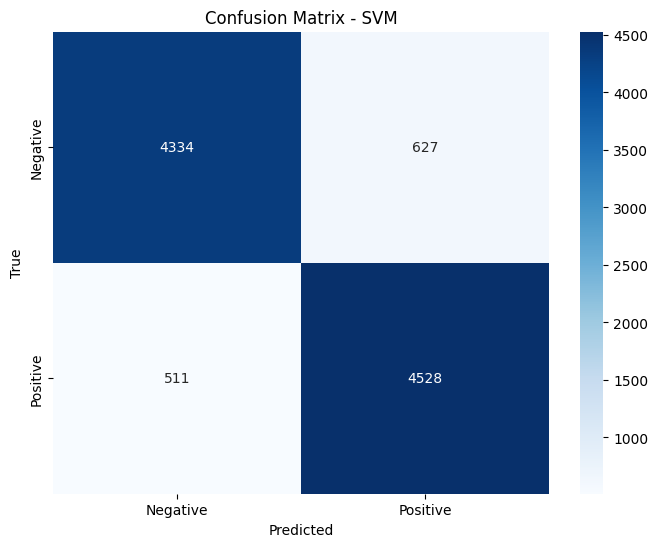

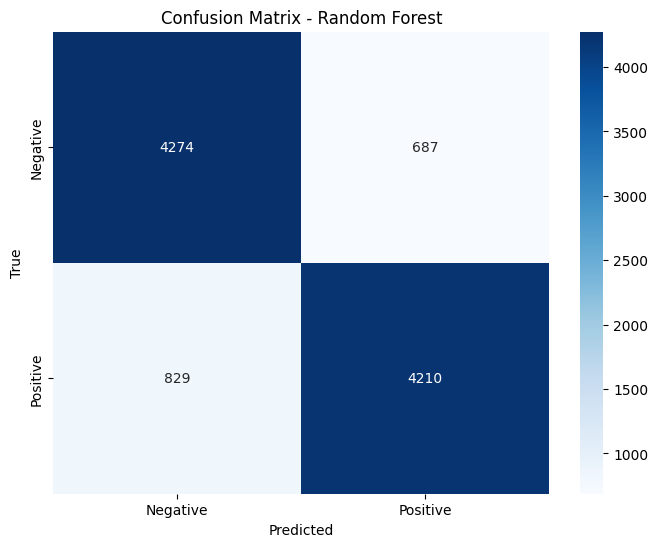

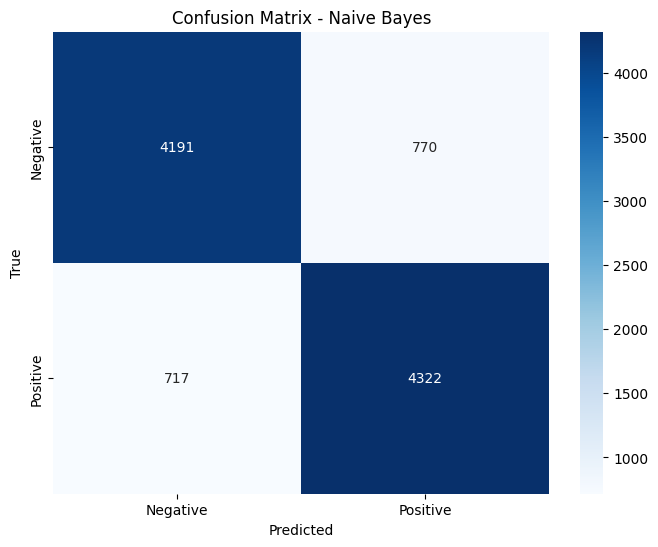

In [23]:
# SVM
svm_predictions = svm_model.predict(X_test_tfidf)
svm_confusion = confusion_matrix(test_labels, svm_predictions)

# Random Forest
rf_predictions = rf_model.predict(X_test_tfidf)
rf_confusion = confusion_matrix(test_labels, rf_predictions)

# Naive Bayes
nb_predictions = nb_model.predict(X_test_tfidf)
nb_confusion = confusion_matrix(test_labels, nb_predictions)

# Fonction pour afficher la matrice de confusion
def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Affichage des matrices de confusion
plot_confusion_matrix(svm_confusion, "SVM")
plot_confusion_matrix(rf_confusion, "Random Forest")
plot_confusion_matrix(nb_confusion, "Naive Bayes")


### Précisions des modèles

Trois modèles d'apprentissage pour l'analyse des sentiments ont été implémentés et évalués : SVM, Random Forest et Naive Bayes. Les modèles ont été entraînés sur les données d'entraînement, évalués sur les données de test et testés sur de nouvelles critiques. 

In [24]:
# Affichage du tableau - Précisions des modèles
precisions = [accuracy, rf_accuracy, nb_accuracy]
table_data = [['SVM', accuracy], ['Random Forest', rf_accuracy], ['Naive Bayes', nb_accuracy]]
table = tabulate(table_data, headers=['Modèle', 'Précision'], tablefmt='fancy_grid')
print(table)

╒═══════════════╤═════════════╕
│ Modèle        │   Précision │
╞═══════════════╪═════════════╡
│ SVM           │      0.8862 │
├───────────────┼─────────────┤
│ Random Forest │      0.8484 │
├───────────────┼─────────────┤
│ Naive Bayes   │      0.8513 │
╘═══════════════╧═════════════╛


Le modèle SVM a obtenu la meilleure précision parmi les trois modèles, avec une précision de 88.62%.
Le modèle Random Forest a obtenu une précision de 84.84%, tandis que le modèle Naive Bayes a obtenu une précision de 85.13%.

================FIN=====Projet================